In [1]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
MathStudentsDF = pandas.read_csv("DataSets/student-mat.csv")
PorStudentsDF = pandas.read_csv("DataSets/student-por.csv")
MathStudentsDF
PorStudentsDF

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
#spajanje datasetova

Data = MathStudentsDF.append([MathStudentsDF,PorStudentsDF])
Data.drop(['school', 'Mjob', 'Fjob', 'reason', 'guardian','nursery','Medu','Fedu','famrel','traveltime', 'address', 'famsize', 'schoolsup', 'famsup'], axis=1, inplace=True)
#x = Data.iloc[:, [3]].values
Data

,sex,age,Pstatus,studytime,failures,paid,activities,higher,internet,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,A,2,0,no,no,yes,no,no,3,4,1,1,3,6,5,6,6
1,F,17,T,2,0,no,no,yes,yes,no,3,3,1,1,3,4,5,5,6
2,F,15,T,2,3,yes,no,yes,yes,no,3,2,2,3,3,10,7,8,10
3,F,15,T,3,0,yes,yes,yes,yes,yes,2,2,1,1,5,2,15,14,15
4,F,16,T,2,0,yes,no,yes,no,no,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,T,3,1,no,yes,yes,yes,no,4,2,1,2,5,4,10,11,10
645,F,18,T,2,0,no,no,yes,yes,no,3,4,1,1,1,4,15,15,16
646,F,18,T,2,0,no,yes,yes,no,no,1,1,1,1,5,6,11,12,9
647,M,17,T,1,0,no,no,yes,yes,no,4,5,3,4,2,6,10,10,10


<AxesSubplot:xlabel='G3', ylabel='count'>

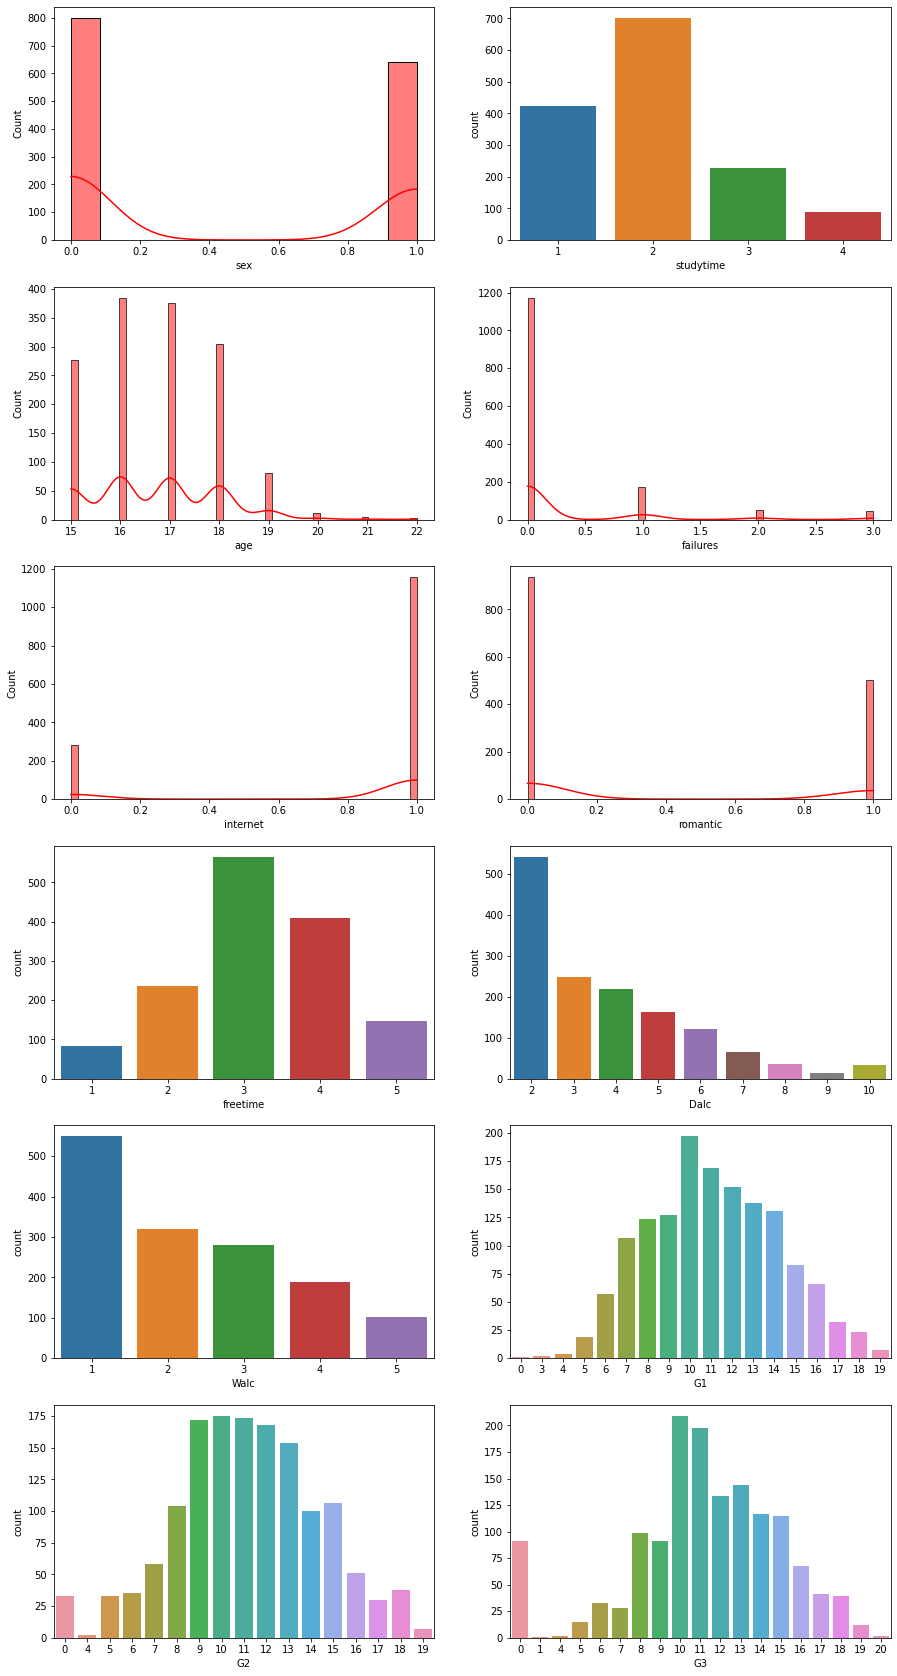

In [124]:
fig1, axs1 = plt.subplots(6, 2, figsize=(15, 30), num='Stats visualized')
sns.histplot(x=Data['sex'], ax=axs1[0,0], color='red', kde=True)  # 
sns.countplot(x=Data['studytime'], ax=axs1[0,1])
sns.histplot(x=Data['age'], ax=axs1[1,0], color='red', bins=50, kde=True)  #
sns.histplot(x=Data['failures'], ax=axs1[1,1], color='red', bins=50, kde=True)  #
sns.histplot(x=Data['internet'], ax=axs1[2,0], color='red', bins=50, kde=True)  #
sns.histplot(x=Data['romantic'], ax=axs1[2,1], color='red', bins=50, kde=True)  #
sns.countplot(x=Data['freetime'], ax=axs1[3,0])
sns.countplot(x=Data['Dalc'], ax=axs1[3,1])
sns.countplot(x=Data['Walc'], ax=axs1[4,0])
sns.countplot(x=Data['G1'], ax=axs1[4,1])
sns.countplot(x=Data['G2'], ax=axs1[5,0])
sns.countplot(x=Data['G3'], ax=axs1[5,1])

In [8]:
#1-for male , 0 for female
Data['sex'] = Data['sex'].replace(['F'],int('0'))
Data['sex'] = Data['sex'].replace(['M'],int('1'))

#0 - for A (apart living), 1 - for living together
Data['Pstatus'] = Data['Pstatus'].replace(['A'],int('0'))
Data['Pstatus'] = Data['Pstatus'].replace(['T'],int('1'))

#0 - no paid classes, 1 - paid classes
Data['paid'] = Data['paid'].replace(['no'],int('0'))
Data['paid'] = Data['paid'].replace(['yes'],int('1'))

#0 - no activities, 1 - activities
Data['activities'] = Data['activities'].replace(['no'],int('0'))
Data['activities'] = Data['activities'].replace(['yes'],int('1'))

#0 - doesn't want higher edu, 1 - want higher edu
Data['higher'] = Data['higher'].replace(['no'],int('0'))
Data['higher'] = Data['higher'].replace(['yes'],int('1'))

#0 - no internet, 1 - have internet
Data['internet'] = Data['internet'].replace(['no'],int('0'))
Data['internet'] = Data['internet'].replace(['yes'],int('1'))

#0 -  romantic relationship false, 1 - romantic relationship true
Data['romantic'] = Data['romantic'].replace(['no'],int('0'))
Data['romantic'] = Data['romantic'].replace(['yes'],int('1'))

Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 648
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         1439 non-null   int64
 1   age         1439 non-null   int64
 2   Pstatus     1439 non-null   int64
 3   studytime   1439 non-null   int64
 4   failures    1439 non-null   int64
 5   paid        1439 non-null   int64
 6   activities  1439 non-null   int64
 7   higher      1439 non-null   int64
 8   internet    1439 non-null   int64
 9   romantic    1439 non-null   int64
 10  freetime    1439 non-null   int64
 11  goout       1439 non-null   int64
 12  Dalc        1439 non-null   int64
 13  Walc        1439 non-null   int64
 14  health      1439 non-null   int64
 15  absences    1439 non-null   int64
 16  G1          1439 non-null   int64
 17  G2          1439 non-null   int64
 18  G3          1439 non-null   int64
dtypes: int64(19)
memory usage: 224.8 KB


In [9]:
Data.describe()

,sex,age,Pstatus,studytime,failures,paid,activities,higher,internet,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.00000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,0.444753,16.717860,0.887422,1.988186,0.28353,0.278666,0.498263,0.924253,0.803336,0.349548,3.210563,3.143155,1.490618,2.286310,3.546213,4.784573,11.129951,11.100069,11.087561
std,0.497111,1.249604,0.316186,0.835911,0.68173,0.448499,0.500171,0.264685,0.397615,0.476993,1.022419,1.141733,0.905716,1.285427,1.414872,6.770796,3.081045,3.429358,4.093396
min,0.000000,15.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,9.500000
50%,0.000000,17.000000,1.000000,2.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,1.000000,18.000000,1.000000,2.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,22.000000,1.000000,4.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, 'sex'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'Pstatus'),
  Text(0, 3.5, 'studytime'),
  Text(0, 4.5, 'failures'),
  Text(0, 5.5, 'paid'),
  Text(0, 6.5, 'activities'),
  Text(0, 7.5, 'higher'),
  Text(0, 8.5, 'internet'),
  Text(0, 9.5, 'romantic'),
  Text(0, 10.5, 'freetime'),
  Text(0, 11.5, 'goout'),
  Text(0, 12.5, 'Dalc'),
  Text(0, 13.5, 'Walc'),
  Text(0, 14.5, 'health'),
  Text(0, 15.5, 'absences'),
  Text(0, 16.5, 'G1'),
  Text(0, 17.5, 'G2'),
  Text(0, 18.5, 'G3')])

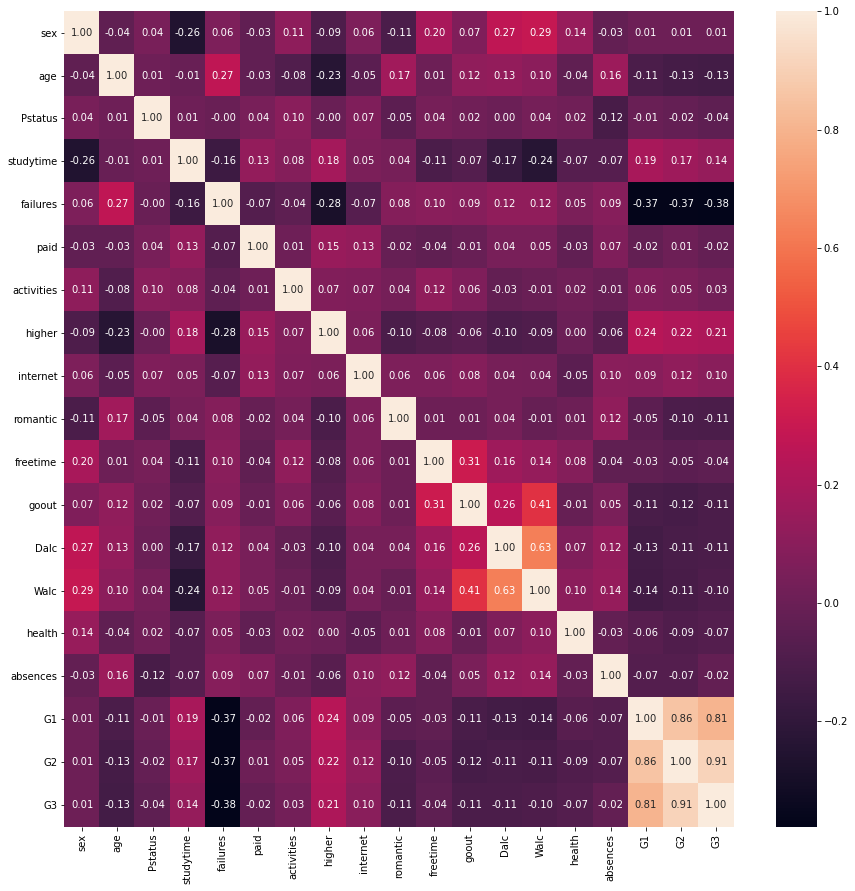

In [10]:
# Correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(Data.corr(), annot = True, fmt= ".2f", cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

Text(0.5, 0, 'Weekly alcohol consumption')

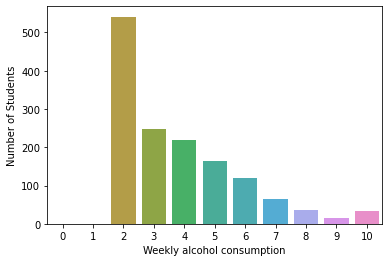

In [11]:
# ocene su u korelaciji najvise
# konzumiranje alkohola nedeljno 
# spajaju se kolone za konzumiranje alkohola vikendom i radnim danima i prikazuje koliko studenti piju nedeljno
Data2 = Data
Data2['Dalc'] = Data2['Dalc'] + Data2['Walc']
list = []
for i in range(11):
    list.append(len(Data2[Data2.Dalc == i]))
    
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

In [12]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
data_std = scaler.fit_transform(Data)
data_pd = pandas.DataFrame(data_std)
data_pd.columns = Data.columns
data_pd

,sex,age,Pstatus,studytime,failures,paid,activities,higher,internet,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,-0.894987,1.026394,-2.807618,0.014138,-0.416042,-0.621546,-0.996531,0.286278,-2.021090,-0.733071,-0.206017,0.750739,-0.894751,-1.001035,-0.386185,0.179573,-1.990261,-1.487696,-1.243303
1,-0.894987,0.225862,0.356174,0.014138,-0.416042,-0.621546,-0.996531,0.286278,0.494782,-0.733071,-0.206017,-0.125428,-0.894751,-1.001035,-0.386185,-0.115916,-1.990261,-1.779397,-1.243303
2,-0.894987,-1.375201,0.356174,0.014138,3.986054,1.608891,-0.996531,0.286278,0.494782,-0.733071,-0.206017,-1.001594,0.615863,0.555409,-0.386185,0.770550,-1.340905,-0.904294,-0.265779
3,-0.894987,-1.375201,0.356174,1.210853,-0.416042,1.608891,1.003481,0.286278,0.494782,1.364124,-1.184430,-1.001594,-0.894751,-1.001035,1.027862,-0.411405,1.256520,0.845913,0.956125
4,-0.894987,-0.574669,0.356174,0.014138,-0.416042,1.608891,-0.996531,0.286278,-2.021090,-0.733071,-0.206017,-1.001594,-0.391213,-0.222813,1.027862,-0.115916,-1.665583,-0.320892,-0.265779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,-0.894987,1.826926,0.356174,1.210853,1.051323,-0.621546,1.003481,0.286278,0.494782,-0.733071,0.772395,-1.001594,-0.391213,-0.222813,1.027862,-0.115916,-0.366870,-0.029190,-0.265779
1435,-0.894987,1.026394,0.356174,0.014138,-0.416042,-0.621546,-0.996531,0.286278,0.494782,-0.733071,-0.206017,0.750739,-0.894751,-1.001035,-1.800233,-0.115916,1.256520,1.137614,1.200506
1436,-0.894987,1.026394,0.356174,0.014138,-0.416042,-0.621546,1.003481,0.286278,-2.021090,-0.733071,-2.162843,-1.877760,-0.894751,-1.001035,1.027862,0.179573,-0.042192,0.262511,-0.510160
1437,1.117335,0.225862,0.356174,-1.182577,-0.416042,-0.621546,-0.996531,0.286278,0.494782,-0.733071,0.772395,1.626905,1.622940,1.333631,-1.093209,0.179573,-0.366870,-0.320892,-0.265779


In [13]:
#vrednost koja se predvidja
Y = Data['Dalc']
X = data_pd.drop('Dalc', axis=1)

#skaliranje vrednosti za predvidjanje
scaler = StandardScaler()

In [14]:
# deljenje podataka na trening i test podatke 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (1151, 18)
Y train shape:  (1151,)
X test shape:  (288, 18)
Y test shape:  (288,)


In [15]:
X_test

,sex,age,Pstatus,studytime,failures,paid,activities,higher,internet,romantic,freetime,goout,Walc,health,absences,G1,G2,G3
1290,1.117335,0.225862,0.356174,-1.182577,1.051323,-0.621546,1.003481,-3.493112,0.494782,1.364124,-0.206017,1.626905,2.111853,-1.800233,1.066039,-1.665583,-1.195995,-0.998922
137,-0.894987,-0.574669,-2.807618,-1.182577,2.518688,-0.621546,1.003481,0.286278,0.494782,1.364124,-0.206017,-1.001594,-1.001035,1.027862,-0.706894,-2.314939,-3.237903,-2.709588
1094,-0.894987,1.026394,0.356174,1.210853,-0.416042,-0.621546,1.003481,0.286278,0.494782,1.364124,-0.206017,-0.125428,-1.001035,-0.386185,-0.706894,-0.042192,0.262511,0.467364
1425,-0.894987,0.225862,0.356174,0.014138,-0.416042,-0.621546,1.003481,0.286278,0.494782,-0.733071,1.750808,0.750739,0.555409,-1.800233,0.770550,-1.016227,-0.612593,-0.510160
560,1.117335,-0.574669,0.356174,-1.182577,1.051323,-0.621546,1.003481,-3.493112,-2.021090,-0.733071,1.750808,-1.001594,-1.001035,-1.093209,1.657017,0.282486,-0.029190,0.222983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,-0.894987,0.225862,0.356174,-1.182577,-0.416042,-0.621546,-0.996531,0.286278,-2.021090,-0.733071,-1.184430,-1.877760,-0.222813,-0.386185,0.179573,0.282486,-0.029190,-0.021398
696,1.117335,0.225862,0.356174,-1.182577,-0.416042,1.608891,-0.996531,0.286278,0.494782,-0.733071,-2.162843,-1.877760,-0.222813,1.027862,-0.706894,-0.042192,-0.029190,-0.265779
1415,-0.894987,1.026394,0.356174,-1.182577,-0.416042,-0.621546,-0.996531,0.286278,0.494782,1.364124,-1.184430,-0.125428,-0.222813,0.320838,-0.706894,-0.366870,-0.320892,-0.265779
1278,-0.894987,1.826926,0.356174,1.210853,1.051323,-0.621546,1.003481,-3.493112,-2.021090,1.364124,-0.206017,-1.877760,-1.001035,-0.386185,0.179573,-1.340905,-0.612593,-0.510160


In [16]:
Y_test

500    10
137     2
304     2
635     5
165     2
       ..
228     3
301     4
625     3
488     2
239     2
Name: Dalc, Length: 288, dtype: int64

In [17]:
X_train

,sex,age,Pstatus,studytime,failures,paid,activities,higher,internet,romantic,freetime,goout,Walc,health,absences,G1,G2,G3
1183,-0.894987,1.026394,0.356174,2.407568,-0.416042,-0.621546,-0.996531,0.286278,0.494782,-0.733071,-0.206017,-0.125428,-1.001035,-1.800233,-0.115916,0.931842,0.845913,0.956125
1430,1.117335,1.026394,0.356174,-1.182577,1.051323,1.608891,-0.996531,0.286278,-2.021090,-0.733071,0.772395,-0.125428,0.555409,-0.386185,-0.706894,-1.340905,-1.195995,-2.709588
824,1.117335,-0.574669,0.356174,-1.182577,-0.416042,-0.621546,-0.996531,0.286278,0.494782,-0.733071,0.772395,-0.125428,-1.001035,1.027862,-0.115916,0.282486,0.262511,0.222983
1053,1.117335,1.026394,0.356174,0.014138,-0.416042,-0.621546,-0.996531,-3.493112,0.494782,-0.733071,1.750808,0.750739,2.111853,-1.093209,1.657017,-1.016227,-1.195995,-0.754541
127,-0.894987,1.826926,0.356174,0.014138,3.986054,-0.621546,-0.996531,-3.493112,-2.021090,-0.733071,0.772395,-1.001594,-1.001035,1.027862,-0.411405,-1.340905,-0.904294,-0.510160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,1.117335,-1.375201,0.356174,2.407568,-0.416042,-0.621546,-0.996531,0.286278,0.494782,-0.733071,-0.206017,-0.125428,-1.001035,-0.386185,-0.706894,-0.366870,-0.320892,-0.265779
299,1.117335,1.026394,0.356174,-1.182577,-0.416042,1.608891,-0.996531,0.286278,0.494782,1.364124,0.772395,-1.001594,-0.222813,-1.800233,0.031828,1.581198,1.137614,1.200506
493,-0.894987,-0.574669,0.356174,-1.182577,-0.416042,-0.621546,1.003481,0.286278,0.494782,-0.733071,-0.206017,0.750739,-0.222813,-1.800233,0.179573,-0.042192,0.845913,0.711744
527,-0.894987,0.225862,0.356174,-1.182577,-0.416042,-0.621546,-0.996531,0.286278,0.494782,1.364124,0.772395,0.750739,0.555409,1.027862,1.066039,-0.366870,0.554212,0.222983


In [22]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
def build_regressor(optimizer, lossFunc):
    classifier = Sequential()
    classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 18))
    classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = lossFunc)
    return classifier

In [25]:
classifier = KerasRegressor(build_fn = build_regressor, verbose = 1)
parameters = {'batch_size': [25,32],
              'epochs': [50,100],
              'optimizer': ['adam', 'rmsprop'],
              'lossFunc':['huber_loss', 'mean_squared_error', 'mean_absolute_error']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           cv = 3,
                          verbose = 10)
grid_search = grid_search.fit(X_train, Y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

best_parameters
best_accuracy

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 1/24] START batch_size=25, epochs=50, lossFunc=huber_loss, optimizer=adam
Epoch 1/50
31/31 [==============================] - 0s 1ms/step - loss: 2.6514
Epoch 2/50
31/31 [==============================] - 0s 1ms/step - loss: 2.7387
Epoch 3/50
31/31 [==============================] - 0s 964us/step - loss: 2.5687
Epoch 4/50
31/31 [==============================] - 0s 931us/step - loss: 2.5565
Epoch 5/50
31/31 [==============================] - 0s 1ms/step - loss: 2.4242
Epoch 6/50
31/31 [==============================] - 0s 798us/step - loss: 2.2222
Epoch 7/50
31/31 [==============================] - 0s 864us/step - loss: 2.2862
Epoch 8/50
31/31 [==============================] - 0s 831us/step - loss: 2.2021
Epoch 9/50
31/31 [==============================] - 0s 831us/step - loss: 2.2307
Epoch 10/50
31/31 [==============================] - 0s 931us/step - loss: 2.2830
Epoch 11/50
31/31 [==============================] 

31/31 [==============================] - 0s 964us/step - loss: 2.3806
Epoch 45/50
31/31 [==============================] - 0s 931us/step - loss: 2.3153
Epoch 46/50
31/31 [==============================] - 0s 931us/step - loss: 2.3857
Epoch 47/50
31/31 [==============================] - 0s 864us/step - loss: 2.3945
Epoch 48/50
31/31 [==============================] - 0s 965us/step - loss: 2.2034
Epoch 49/50
31/31 [==============================] - 0s 898us/step - loss: 2.4534
Epoch 50/50
16/16 [==============================] - 0s 931us/step - loss: 2.1226
[CV 2/3; 1/24] END batch_size=25, epochs=50, lossFunc=huber_loss, optimizer=adam; total time=   2.1s
[CV 3/3; 1/24] START batch_size=25, epochs=50, lossFunc=huber_loss, optimizer=adam
Epoch 1/50
31/31 [==============================] - 0s 964us/step - loss: 2.7930
Epoch 2/50
31/31 [==============================] - 0s 954us/step - loss: 2.7322
Epoch 3/50
31/31 [==============================] - 0s 997us/step - loss: 2.6436
Epoch 4/50


31/31 [==============================] - 0s 997us/step - loss: 2.2950
Epoch 39/50
31/31 [==============================] - 0s 964us/step - loss: 2.1866
Epoch 40/50
31/31 [==============================] - 0s 964us/step - loss: 2.3040
Epoch 41/50
31/31 [==============================] - 0s 1ms/step - loss: 2.2349
Epoch 42/50
31/31 [==============================] - 0s 964us/step - loss: 2.1464
Epoch 43/50
31/31 [==============================] - 0s 996us/step - loss: 2.1601
Epoch 44/50
31/31 [==============================] - 0s 930us/step - loss: 2.2420
Epoch 45/50
31/31 [==============================] - 0s 987us/step - loss: 2.2136
Epoch 46/50
31/31 [==============================] - 0s 967us/step - loss: 2.1824
Epoch 47/50
31/31 [==============================] - 0s 931us/step - loss: 2.2848
Epoch 48/50
31/31 [==============================] - 0s 932us/step - loss: 2.2197
Epoch 49/50
31/31 [==============================] - 0s 1ms/step - loss: 2.2630
Epoch 50/50
16/16 [=============

31/31 [==============================] - 0s 864us/step - loss: 2.2050
Epoch 33/50
31/31 [==============================] - 0s 898us/step - loss: 2.1812
Epoch 34/50
31/31 [==============================] - 0s 964us/step - loss: 2.2738
Epoch 35/50
31/31 [==============================] - 0s 831us/step - loss: 2.3578
Epoch 36/50
31/31 [==============================] - 0s 864us/step - loss: 2.2367
Epoch 37/50
31/31 [==============================] - 0s 931us/step - loss: 2.1868
Epoch 38/50
31/31 [==============================] - 0s 898us/step - loss: 2.2826
Epoch 39/50
31/31 [==============================] - 0s 832us/step - loss: 2.2033
Epoch 40/50
31/31 [==============================] - 0s 864us/step - loss: 2.3660
Epoch 41/50
31/31 [==============================] - 0s 898us/step - loss: 2.1210
Epoch 42/50
31/31 [==============================] - 0s 832us/step - loss: 2.3259
Epoch 43/50
31/31 [==============================] - 0s 902us/step - loss: 2.3076
Epoch 44/50
31/31 [=========

31/31 [==============================] - 0s 831us/step - loss: 11.9900
Epoch 25/50
31/31 [==============================] - 0s 831us/step - loss: 13.2212
Epoch 26/50
31/31 [==============================] - 0s 864us/step - loss: 11.9619
Epoch 27/50
31/31 [==============================] - 0s 866us/step - loss: 12.0275
Epoch 28/50
31/31 [==============================] - 0s 765us/step - loss: 12.5577
Epoch 29/50
31/31 [==============================] - 0s 832us/step - loss: 12.6631
Epoch 30/50
31/31 [==============================] - 0s 798us/step - loss: 10.9994
Epoch 31/50
31/31 [==============================] - 0s 798us/step - loss: 12.4966
Epoch 32/50
31/31 [==============================] - 0s 865us/step - loss: 11.8193
Epoch 33/50
31/31 [==============================] - 0s 799us/step - loss: 12.6943
Epoch 34/50
31/31 [==============================] - 0s 831us/step - loss: 13.0659
Epoch 35/50
31/31 [==============================] - 0s 823us/step - loss: 11.0983
Epoch 36/50
31/3

31/31 [==============================] - 0s 897us/step - loss: 11.0568
Epoch 17/50
31/31 [==============================] - 0s 831us/step - loss: 11.0210
Epoch 18/50
31/31 [==============================] - 0s 929us/step - loss: 10.6128
Epoch 19/50
31/31 [==============================] - 0s 883us/step - loss: 11.3670
Epoch 20/50
31/31 [==============================] - 0s 831us/step - loss: 11.1544
Epoch 21/50
31/31 [==============================] - 0s 956us/step - loss: 11.2552
Epoch 22/50
31/31 [==============================] - 0s 882us/step - loss: 12.3127
Epoch 23/50
31/31 [==============================] - 0s 897us/step - loss: 10.9855
Epoch 24/50
31/31 [==============================] - 0s 834us/step - loss: 11.5643
Epoch 25/50
31/31 [==============================] - 0s 898us/step - loss: 11.4611
Epoch 26/50
31/31 [==============================] - 0s 898us/step - loss: 12.1478
Epoch 27/50
31/31 [==============================] - 0s 831us/step - loss: 11.8904
Epoch 28/50
31/3

31/31 [==============================] - 0s 964us/step - loss: 11.8752
Epoch 8/50
31/31 [==============================] - 0s 944us/step - loss: 11.8974
Epoch 9/50
31/31 [==============================] - 0s 962us/step - loss: 11.2218
Epoch 10/50
31/31 [==============================] - 0s 864us/step - loss: 12.0640
Epoch 11/50
31/31 [==============================] - 0s 831us/step - loss: 11.6585
Epoch 12/50
31/31 [==============================] - 0s 933us/step - loss: 10.9424
Epoch 13/50
31/31 [==============================] - 0s 898us/step - loss: 11.6425
Epoch 14/50
31/31 [==============================] - 0s 990us/step - loss: 10.7905
Epoch 15/50
31/31 [==============================] - 0s 866us/step - loss: 11.7225
Epoch 16/50
31/31 [==============================] - 0s 898us/step - loss: 11.0815
Epoch 17/50
31/31 [==============================] - 0s 843us/step - loss: 10.6992
Epoch 18/50
31/31 [==============================] - 0s 964us/step - loss: 10.6044
Epoch 19/50
31/31 

Epoch 1/50
31/31 [==============================] - 0s 866us/step - loss: 3.2631
Epoch 2/50
31/31 [==============================] - 0s 864us/step - loss: 3.4200
Epoch 3/50
31/31 [==============================] - 0s 950us/step - loss: 3.3510
Epoch 4/50
31/31 [==============================] - 0s 865us/step - loss: 3.2476
Epoch 5/50
31/31 [==============================] - 0s 866us/step - loss: 3.0140
Epoch 6/50
31/31 [==============================] - 0s 844us/step - loss: 2.8988
Epoch 7/50
31/31 [==============================] - 0s 897us/step - loss: 2.8651
Epoch 8/50
31/31 [==============================] - 0s 898us/step - loss: 2.8427
Epoch 9/50
31/31 [==============================] - 0s 964us/step - loss: 2.8820
Epoch 10/50
31/31 [==============================] - 0s 997us/step - loss: 2.9554
Epoch 11/50
31/31 [==============================] - 0s 831us/step - loss: 2.7713
Epoch 12/50
31/31 [==============================] - 0s 931us/step - loss: 2.8138
Epoch 13/50
31/31 [======

31/31 [==============================] - 0s 931us/step - loss: 2.8583
Epoch 48/50
31/31 [==============================] - 0s 964us/step - loss: 2.7946
Epoch 49/50
31/31 [==============================] - 0s 992us/step - loss: 2.7444
Epoch 50/50
16/16 [==============================] - 0s 867us/step - loss: 2.8303
[CV 3/3; 5/24] END batch_size=25, epochs=50, lossFunc=mean_absolute_error, optimizer=adam; total time=   2.0s
[CV 1/3; 6/24] START batch_size=25, epochs=50, lossFunc=mean_absolute_error, optimizer=rmsprop
Epoch 1/50
31/31 [==============================] - 1s 864us/step - loss: 3.2221
Epoch 2/50
31/31 [==============================] - 0s 925us/step - loss: 3.1684
Epoch 3/50
31/31 [==============================] - 0s 863us/step - loss: 3.0936
Epoch 4/50
31/31 [==============================] - 0s 931us/step - loss: 3.0104
Epoch 5/50
31/31 [==============================] - 0s 964us/step - loss: 2.9274
Epoch 6/50
31/31 [==============================] - 0s 864us/step - loss: 

31/31 [==============================] - 0s 831us/step - loss: 2.7746
Epoch 40/50
31/31 [==============================] - 0s 798us/step - loss: 2.8748
Epoch 41/50
31/31 [==============================] - 0s 766us/step - loss: 2.9286
Epoch 42/50
31/31 [==============================] - 0s 864us/step - loss: 3.0117
Epoch 43/50
31/31 [==============================] - 0s 765us/step - loss: 2.8284
Epoch 44/50
31/31 [==============================] - 0s 798us/step - loss: 2.9235
Epoch 45/50
31/31 [==============================] - 0s 799us/step - loss: 2.9236
Epoch 46/50
31/31 [==============================] - 0s 765us/step - loss: 2.9745
Epoch 47/50
31/31 [==============================] - 0s 798us/step - loss: 2.8249
Epoch 48/50
31/31 [==============================] - 0s 765us/step - loss: 2.8461
Epoch 49/50
31/31 [==============================] - 0s 798us/step - loss: 2.9139
Epoch 50/50
16/16 [==============================] - 0s 863us/step - loss: 2.6224
[CV 2/3; 6/24] END batch_siz

31/31 [==============================] - 0s 964us/step - loss: 2.3092
Epoch 32/100
31/31 [==============================] - 0s 946us/step - loss: 2.2601
Epoch 33/100
31/31 [==============================] - 0s 997us/step - loss: 2.2474
Epoch 34/100
31/31 [==============================] - 0s 864us/step - loss: 2.3253
Epoch 35/100
31/31 [==============================] - 0s 863us/step - loss: 2.1777
Epoch 36/100
31/31 [==============================] - 0s 931us/step - loss: 2.2798
Epoch 37/100
31/31 [==============================] - 0s 932us/step - loss: 2.2743
Epoch 38/100
31/31 [==============================] - 0s 932us/step - loss: 2.1170
Epoch 39/100
31/31 [==============================] - 0s 931us/step - loss: 2.1241
Epoch 40/100
31/31 [==============================] - 0s 997us/step - loss: 2.1819
Epoch 41/100
31/31 [==============================] - 0s 931us/step - loss: 2.1074
Epoch 42/100
31/31 [==============================] - 0s 954us/step - loss: 2.2364
Epoch 43/100
31/3

31/31 [==============================] - 0s 1ms/step - loss: 2.3002
Epoch 27/100
31/31 [==============================] - 0s 997us/step - loss: 2.4339
Epoch 28/100
31/31 [==============================] - 0s 997us/step - loss: 2.3536
Epoch 29/100
31/31 [==============================] - 0s 943us/step - loss: 2.4892
Epoch 30/100
31/31 [==============================] - 0s 997us/step - loss: 2.4945
Epoch 31/100
31/31 [==============================] - 0s 964us/step - loss: 2.3845
Epoch 32/100
31/31 [==============================] - 0s 997us/step - loss: 2.3776
Epoch 33/100
31/31 [==============================] - 0s 898us/step - loss: 2.3407
Epoch 34/100
31/31 [==============================] - 0s 965us/step - loss: 2.2909
Epoch 35/100
31/31 [==============================] - 0s 898us/step - loss: 2.3628
Epoch 36/100
31/31 [==============================] - 0s 977us/step - loss: 2.3018
Epoch 37/100
31/31 [==============================] - 0s 931us/step - loss: 2.3884
Epoch 38/100
31/31 

31/31 [==============================] - 0s 1ms/step - loss: 2.2108
Epoch 23/100
31/31 [==============================] - 0s 979us/step - loss: 2.1891
Epoch 24/100
31/31 [==============================] - 0s 1ms/step - loss: 2.2936
Epoch 25/100
31/31 [==============================] - 0s 931us/step - loss: 2.2788
Epoch 26/100
31/31 [==============================] - 0s 1ms/step - loss: 2.2150
Epoch 27/100
31/31 [==============================] - ETA: 0s - loss: 1.900 - 0s 964us/step - loss: 2.1542
Epoch 28/100
31/31 [==============================] - 0s 1ms/step - loss: 2.3359
Epoch 29/100
31/31 [==============================] - 0s 997us/step - loss: 2.2201
Epoch 30/100
31/31 [==============================] - 0s 1ms/step - loss: 2.2111
Epoch 31/100
31/31 [==============================] - 0s 899us/step - loss: 2.2430
Epoch 32/100
31/31 [==============================] - 0s 1ms/step - loss: 2.3013
Epoch 33/100
31/31 [==============================] - 0s 931us/step - loss: 2.1829
Epoch

31/31 [==============================] - 0s 899us/step - loss: 2.2675
Epoch 18/100
31/31 [==============================] - 0s 998us/step - loss: 2.1808
Epoch 19/100
31/31 [==============================] - 0s 899us/step - loss: 2.1623
Epoch 20/100
31/31 [==============================] - 0s 931us/step - loss: 2.2700
Epoch 21/100
31/31 [==============================] - 0s 931us/step - loss: 2.1603
Epoch 22/100
31/31 [==============================] - 0s 931us/step - loss: 2.2546
Epoch 23/100
31/31 [==============================] - 0s 898us/step - loss: 2.2968
Epoch 24/100
31/31 [==============================] - 0s 899us/step - loss: 2.2059
Epoch 25/100
31/31 [==============================] - 0s 964us/step - loss: 2.1993
Epoch 26/100
31/31 [==============================] - 0s 928us/step - loss: 2.2355
Epoch 27/100
31/31 [==============================] - 0s 1ms/step - loss: 2.2510
Epoch 28/100
31/31 [==============================] - 0s 931us/step - loss: 2.2702
Epoch 29/100
31/31 

31/31 [==============================] - 0s 898us/step - loss: 2.2906
Epoch 13/100
31/31 [==============================] - 0s 898us/step - loss: 2.3606
Epoch 14/100
31/31 [==============================] - 0s 997us/step - loss: 2.3845
Epoch 15/100
31/31 [==============================] - 0s 932us/step - loss: 2.2999
Epoch 16/100
31/31 [==============================] - 0s 897us/step - loss: 2.3525
Epoch 17/100
31/31 [==============================] - ETA: 0s - loss: 2.700 - 0s 1ms/step - loss: 2.3487
Epoch 18/100
31/31 [==============================] - 0s 931us/step - loss: 2.3596
Epoch 19/100
31/31 [==============================] - 0s 997us/step - loss: 2.3504
Epoch 20/100
31/31 [==============================] - 0s 930us/step - loss: 2.4909
Epoch 21/100
31/31 [==============================] - 0s 1ms/step - loss: 2.3683
Epoch 22/100
31/31 [==============================] - 0s 931us/step - loss: 2.3559
Epoch 23/100
31/31 [==============================] - 0s 964us/step - loss: 2.41

31/31 [==============================] - 0s 864us/step - loss: 2.4635
Epoch 8/100
31/31 [==============================] - 0s 931us/step - loss: 2.3440
Epoch 9/100
31/31 [==============================] - 0s 899us/step - loss: 2.2295
Epoch 10/100
31/31 [==============================] - 0s 966us/step - loss: 2.1948
Epoch 11/100
31/31 [==============================] - 0s 874us/step - loss: 2.2774
Epoch 12/100
31/31 [==============================] - 0s 932us/step - loss: 2.2633
Epoch 13/100
31/31 [==============================] - 0s 931us/step - loss: 2.3736
Epoch 14/100
31/31 [==============================] - 0s 931us/step - loss: 2.3589
Epoch 15/100
31/31 [==============================] - 0s 912us/step - loss: 2.2342
Epoch 16/100
31/31 [==============================] - 0s 897us/step - loss: 2.1565
Epoch 17/100
31/31 [==============================] - 0s 965us/step - loss: 2.3321
Epoch 18/100
31/31 [==============================] - 0s 1ms/step - loss: 2.2394
Epoch 19/100
31/31 [=

31/31 [==============================] - 0s 831us/step - loss: 14.1990
Epoch 3/100
31/31 [==============================] - 0s 765us/step - loss: 14.2607
Epoch 4/100
31/31 [==============================] - 0s 899us/step - loss: 14.0144
Epoch 5/100
31/31 [==============================] - 0s 765us/step - loss: 12.2780
Epoch 6/100
31/31 [==============================] - 0s 898us/step - loss: 13.2093
Epoch 7/100
31/31 [==============================] - 0s 798us/step - loss: 11.8101
Epoch 8/100
31/31 [==============================] - 0s 864us/step - loss: 12.4082
Epoch 9/100
31/31 [==============================] - 0s 931us/step - loss: 12.1062
Epoch 10/100
31/31 [==============================] - 0s 831us/step - loss: 11.5198
Epoch 11/100
31/31 [==============================] - 0s 831us/step - loss: 11.1650
Epoch 12/100
31/31 [==============================] - 0s 864us/step - loss: 12.0653
Epoch 13/100
31/31 [==============================] - 0s 864us/step - loss: 11.3211
Epoch 14/100

31/31 [==============================] - 0s 798us/step - loss: 11.1776
Epoch 100/100
16/16 [==============================] - 0s 707us/step - loss: 12.4011
[CV 1/3; 9/24] END batch_size=25, epochs=100, lossFunc=mean_squared_error, optimizer=adam; total time=   3.3s
[CV 2/3; 9/24] START batch_size=25, epochs=100, lossFunc=mean_squared_error, optimizer=adam
Epoch 1/100
31/31 [==============================] - 0s 798us/step - loss: 15.4729
Epoch 2/100
31/31 [==============================] - 0s 831us/step - loss: 14.9075
Epoch 3/100
31/31 [==============================] - 0s 832us/step - loss: 14.9478
Epoch 4/100
31/31 [==============================] - 0s 831us/step - loss: 13.7626
Epoch 5/100
31/31 [==============================] - 0s 898us/step - loss: 12.2837
Epoch 6/100
31/31 [==============================] - 0s 899us/step - loss: 12.3207
Epoch 7/100
31/31 [==============================] - 0s 864us/step - loss: 12.7470
Epoch 8/100
31/31 [==============================] - 0s 859us

Epoch 93/100
31/31 [==============================] - 0s 864us/step - loss: 13.1520
Epoch 94/100
31/31 [==============================] - 0s 889us/step - loss: 12.0559
Epoch 95/100
31/31 [==============================] - 0s 864us/step - loss: 11.3804
Epoch 96/100
31/31 [==============================] - ETA: 0s - loss: 10.64 - 0s 898us/step - loss: 12.4582
Epoch 97/100
31/31 [==============================] - 0s 789us/step - loss: 11.8200
Epoch 98/100
31/31 [==============================] - 0s 798us/step - loss: 12.1630
Epoch 99/100
31/31 [==============================] - 0s 898us/step - loss: 12.4901
Epoch 100/100
16/16 [==============================] - 0s 798us/step - loss: 10.4144
[CV 2/3; 9/24] END batch_size=25, epochs=100, lossFunc=mean_squared_error, optimizer=adam; total time=   3.3s
[CV 3/3; 9/24] START batch_size=25, epochs=100, lossFunc=mean_squared_error, optimizer=adam
Epoch 1/100
31/31 [==============================] - 0s 720us/step - loss: 14.6618
Epoch 2/100
31/31 

31/31 [==============================] - 0s 998us/step - loss: 11.2489
Epoch 88/100
31/31 [==============================] - 0s 931us/step - loss: 11.4179
Epoch 89/100
31/31 [==============================] - 0s 898us/step - loss: 11.8671
Epoch 90/100
31/31 [==============================] - 0s 964us/step - loss: 11.5941
Epoch 91/100
31/31 [==============================] - 0s 964us/step - loss: 10.3128
Epoch 92/100
31/31 [==============================] - 0s 931us/step - loss: 10.6397
Epoch 93/100
31/31 [==============================] - 0s 997us/step - loss: 11.3908
Epoch 94/100
31/31 [==============================] - 0s 1ms/step - loss: 10.9995
Epoch 95/100
31/31 [==============================] - 0s 731us/step - loss: 11.5283
Epoch 96/100
31/31 [==============================] - 0s 765us/step - loss: 11.5731
Epoch 97/100
31/31 [==============================] - 0s 752us/step - loss: 11.8078
Epoch 98/100
31/31 [==============================] - 0s 765us/step - loss: 12.4784
Epoch 9

31/31 [==============================] - 0s 766us/step - loss: 11.3987
Epoch 83/100
31/31 [==============================] - 0s 798us/step - loss: 11.2824
Epoch 84/100
31/31 [==============================] - 0s 731us/step - loss: 11.1465
Epoch 85/100
31/31 [==============================] - 0s 699us/step - loss: 11.0972
Epoch 86/100
31/31 [==============================] - 0s 831us/step - loss: 10.1069
Epoch 87/100
31/31 [==============================] - 0s 964us/step - loss: 11.6057
Epoch 88/100
31/31 [==============================] - 0s 1ms/step - loss: 11.9311
Epoch 89/100
31/31 [==============================] - 0s 997us/step - loss: 10.2786
Epoch 90/100
31/31 [==============================] - 0s 965us/step - loss: 10.5236
Epoch 91/100
31/31 [==============================] - 0s 998us/step - loss: 11.6914
Epoch 92/100
31/31 [==============================] - 0s 964us/step - loss: 11.7655
Epoch 93/100
31/31 [==============================] - 0s 891us/step - loss: 11.7443
Epoch 9

31/31 [==============================] - 0s 665us/step - loss: 12.7935
Epoch 77/100
31/31 [==============================] - 0s 665us/step - loss: 12.6805
Epoch 78/100
31/31 [==============================] - 0s 632us/step - loss: 11.8269
Epoch 79/100
31/31 [==============================] - 0s 632us/step - loss: 11.7204
Epoch 80/100
31/31 [==============================] - 0s 630us/step - loss: 12.4103
Epoch 81/100
31/31 [==============================] - 0s 632us/step - loss: 13.1011
Epoch 82/100
31/31 [==============================] - 0s 798us/step - loss: 11.1202
Epoch 83/100
31/31 [==============================] - 0s 665us/step - loss: 12.6402
Epoch 84/100
31/31 [==============================] - 0s 765us/step - loss: 11.8982
Epoch 85/100
31/31 [==============================] - 0s 765us/step - loss: 12.5245
Epoch 86/100
31/31 [==============================] - 0s 731us/step - loss: 12.5845
Epoch 87/100
31/31 [==============================] - 0s 731us/step - loss: 13.5996
Epoch

31/31 [==============================] - 0s 826us/step - loss: 10.6692
Epoch 71/100
31/31 [==============================] - 0s 964us/step - loss: 11.6426
Epoch 72/100
31/31 [==============================] - 0s 825us/step - loss: 10.9380
Epoch 73/100
31/31 [==============================] - 0s 897us/step - loss: 12.1702
Epoch 74/100
31/31 [==============================] - 0s 831us/step - loss: 10.9170
Epoch 75/100
31/31 [==============================] - 0s 830us/step - loss: 11.4083
Epoch 76/100
31/31 [==============================] - 0s 864us/step - loss: 12.2421
Epoch 77/100
31/31 [==============================] - 0s 864us/step - loss: 11.3284
Epoch 78/100
31/31 [==============================] - 0s 930us/step - loss: 12.6069
Epoch 79/100
31/31 [==============================] - 0s 840us/step - loss: 11.4982
Epoch 80/100
31/31 [==============================] - 0s 864us/step - loss: 10.2703
Epoch 81/100
31/31 [==============================] - 0s 831us/step - loss: 10.9714
Epoch

Epoch 65/100
31/31 [==============================] - 0s 864us/step - loss: 2.7594
Epoch 66/100
31/31 [==============================] - 0s 898us/step - loss: 2.7493
Epoch 67/100
31/31 [==============================] - 0s 866us/step - loss: 2.7849
Epoch 68/100
31/31 [==============================] - 0s 798us/step - loss: 2.7525
Epoch 69/100
31/31 [==============================] - 0s 864us/step - loss: 2.6413
Epoch 70/100
31/31 [==============================] - 0s 831us/step - loss: 2.7426
Epoch 71/100
31/31 [==============================] - 0s 899us/step - loss: 2.7182
Epoch 72/100
31/31 [==============================] - ETA: 0s - loss: 2.960 - 0s 898us/step - loss: 2.7105
Epoch 73/100
31/31 [==============================] - 0s 864us/step - loss: 2.7336
Epoch 74/100
31/31 [==============================] - 0s 898us/step - loss: 2.5590
Epoch 75/100
31/31 [==============================] - 0s 796us/step - loss: 2.7698
Epoch 76/100
31/31 [==============================] - 0s 864us/

Epoch 60/100
31/31 [==============================] - 0s 899us/step - loss: 2.7868
Epoch 61/100
31/31 [==============================] - 0s 902us/step - loss: 2.9136
Epoch 62/100
31/31 [==============================] - 0s 898us/step - loss: 2.7833
Epoch 63/100
31/31 [==============================] - 0s 931us/step - loss: 2.8808
Epoch 64/100
31/31 [==============================] - 0s 830us/step - loss: 2.8327
Epoch 65/100
31/31 [==============================] - 0s 931us/step - loss: 2.9691
Epoch 66/100
31/31 [==============================] - 0s 831us/step - loss: 2.8163
Epoch 67/100
31/31 [==============================] - 0s 925us/step - loss: 2.7640
Epoch 68/100
31/31 [==============================] - 0s 864us/step - loss: 2.7782
Epoch 69/100
31/31 [==============================] - 0s 865us/step - loss: 2.9922
Epoch 70/100
31/31 [==============================] - 0s 863us/step - loss: 2.9067
Epoch 71/100
31/31 [==============================] - 0s 864us/step - loss: 2.7806
Epoc

31/31 [==============================] - 0s 898us/step - loss: 2.8230
Epoch 56/100
31/31 [==============================] - 0s 897us/step - loss: 2.8208
Epoch 57/100
31/31 [==============================] - 0s 831us/step - loss: 2.6617
Epoch 58/100
31/31 [==============================] - 0s 864us/step - loss: 2.7068
Epoch 59/100
31/31 [==============================] - 0s 897us/step - loss: 2.7801
Epoch 60/100
31/31 [==============================] - 0s 964us/step - loss: 2.8137
Epoch 61/100
31/31 [==============================] - 0s 831us/step - loss: 2.7991
Epoch 62/100
31/31 [==============================] - 0s 866us/step - loss: 2.7949
Epoch 63/100
31/31 [==============================] - 0s 831us/step - loss: 2.6257
Epoch 64/100
31/31 [==============================] - 0s 899us/step - loss: 2.7548
Epoch 65/100
31/31 [==============================] - 0s 898us/step - loss: 2.7530
Epoch 66/100
31/31 [==============================] - 0s 830us/step - loss: 2.6787
Epoch 67/100
31/3

31/31 [==============================] - 0s 831us/step - loss: 2.8169
Epoch 51/100
31/31 [==============================] - 0s 931us/step - loss: 2.7339
Epoch 52/100
31/31 [==============================] - 0s 864us/step - loss: 2.6695
Epoch 53/100
31/31 [==============================] - 0s 831us/step - loss: 2.6973
Epoch 54/100
31/31 [==============================] - 0s 966us/step - loss: 2.7496
Epoch 55/100
31/31 [==============================] - 0s 1ms/step - loss: 2.7033
Epoch 56/100
31/31 [==============================] - 0s 1ms/step - loss: 2.7196
Epoch 57/100
31/31 [==============================] - 0s 997us/step - loss: 2.7311
Epoch 58/100
31/31 [==============================] - 0s 830us/step - loss: 2.6939
Epoch 59/100
31/31 [==============================] - 0s 731us/step - loss: 2.8203
Epoch 60/100
31/31 [==============================] - 0s 864us/step - loss: 2.7715
Epoch 61/100
31/31 [==============================] - 0s 731us/step - loss: 2.6785
Epoch 62/100
31/31 [=

31/31 [==============================] - 0s 665us/step - loss: 2.9431
Epoch 46/100
31/31 [==============================] - 0s 698us/step - loss: 2.8853
Epoch 47/100
31/31 [==============================] - 0s 653us/step - loss: 2.8837
Epoch 48/100
31/31 [==============================] - 0s 632us/step - loss: 2.7604
Epoch 49/100
31/31 [==============================] - 0s 831us/step - loss: 2.9442
Epoch 50/100
31/31 [==============================] - 0s 753us/step - loss: 2.8378
Epoch 51/100
31/31 [==============================] - 0s 665us/step - loss: 2.8709
Epoch 52/100
31/31 [==============================] - 0s 739us/step - loss: 2.7668
Epoch 53/100
31/31 [==============================] - 0s 765us/step - loss: 2.8045
Epoch 54/100
31/31 [==============================] - 0s 731us/step - loss: 2.8992
Epoch 55/100
31/31 [==============================] - 0s 831us/step - loss: 2.8327
Epoch 56/100
31/31 [==============================] - 0s 665us/step - loss: 2.9413
Epoch 57/100
31/3

31/31 [==============================] - 0s 931us/step - loss: 2.7646
Epoch 41/100
31/31 [==============================] - 0s 831us/step - loss: 2.8195
Epoch 42/100
31/31 [==============================] - 0s 797us/step - loss: 2.6354
Epoch 43/100
31/31 [==============================] - 0s 897us/step - loss: 2.7554
Epoch 44/100
31/31 [==============================] - 0s 884us/step - loss: 2.7567
Epoch 45/100
31/31 [==============================] - 0s 863us/step - loss: 2.7507
Epoch 46/100
31/31 [==============================] - 0s 864us/step - loss: 2.7855
Epoch 47/100
31/31 [==============================] - 0s 963us/step - loss: 2.7030
Epoch 48/100
31/31 [==============================] - 0s 1ms/step - loss: 2.7192
Epoch 49/100
31/31 [==============================] - 0s 898us/step - loss: 2.8501
Epoch 50/100
31/31 [==============================] - 0s 964us/step - loss: 2.7474
Epoch 51/100
31/31 [==============================] - 0s 997us/step - loss: 2.7913
Epoch 52/100
31/31 

24/24 [==============================] - 0s 954us/step - loss: 2.2701
Epoch 37/50
24/24 [==============================] - 0s 954us/step - loss: 2.1870
Epoch 38/50
24/24 [==============================] - 0s 867us/step - loss: 2.1477
Epoch 39/50
24/24 [==============================] - 0s 867us/step - loss: 2.1925
Epoch 40/50
24/24 [==============================] - 0s 867us/step - loss: 2.1229
Epoch 41/50
24/24 [==============================] - 0s 927us/step - loss: 2.1383
Epoch 42/50
24/24 [==============================] - 0s 1ms/step - loss: 2.2181
Epoch 43/50
24/24 [==============================] - 0s 997us/step - loss: 2.1482
Epoch 44/50
24/24 [==============================] - 0s 824us/step - loss: 2.1584
Epoch 45/50
24/24 [==============================] - 0s 848us/step - loss: 2.3232
Epoch 46/50
24/24 [==============================] - 0s 867us/step - loss: 2.2091
Epoch 47/50
24/24 [==============================] - 0s 911us/step - loss: 2.1468
Epoch 48/50
24/24 [===========

24/24 [==============================] - 0s 909us/step - loss: 2.2590
Epoch 31/50
24/24 [==============================] - 0s 1ms/step - loss: 2.2974
Epoch 32/50
24/24 [==============================] - 0s 1ms/step - loss: 2.2168
Epoch 33/50
24/24 [==============================] - 0s 997us/step - loss: 2.1750
Epoch 34/50
24/24 [==============================] - 0s 997us/step - loss: 2.2693
Epoch 35/50
24/24 [==============================] - 0s 911us/step - loss: 2.1971
Epoch 36/50
24/24 [==============================] - 0s 954us/step - loss: 2.1975
Epoch 37/50
24/24 [==============================] - 0s 997us/step - loss: 2.2330
Epoch 38/50
24/24 [==============================] - 0s 953us/step - loss: 2.2511
Epoch 39/50
24/24 [==============================] - 0s 956us/step - loss: 2.2071
Epoch 40/50
24/24 [==============================] - 0s 876us/step - loss: 2.3117
Epoch 41/50
24/24 [==============================] - 0s 1ms/step - loss: 2.1531
Epoch 42/50
24/24 [===============

24/24 [==============================] - 0s 824us/step - loss: 2.2718
Epoch 25/50
24/24 [==============================] - 0s 824us/step - loss: 2.4070
Epoch 26/50
24/24 [==============================] - 0s 737us/step - loss: 2.3199
Epoch 27/50
24/24 [==============================] - 0s 781us/step - loss: 2.4588
Epoch 28/50
24/24 [==============================] - 0s 737us/step - loss: 2.3851
Epoch 29/50
24/24 [==============================] - 0s 737us/step - loss: 2.3954
Epoch 30/50
24/24 [==============================] - 0s 780us/step - loss: 2.4795
Epoch 31/50
24/24 [==============================] - 0s 867us/step - loss: 2.3015
Epoch 32/50
24/24 [==============================] - 0s 650us/step - loss: 2.3371
Epoch 33/50
24/24 [==============================] - 0s 694us/step - loss: 2.4115
Epoch 34/50
24/24 [==============================] - 0s 780us/step - loss: 2.4608
Epoch 35/50
24/24 [==============================] - 0s 781us/step - loss: 2.3395
Epoch 36/50
24/24 [=========

Epoch 18/50
24/24 [==============================] - 0s 694us/step - loss: 10.3176
Epoch 19/50
24/24 [==============================] - 0s 781us/step - loss: 12.2506
Epoch 20/50
24/24 [==============================] - 0s 781us/step - loss: 12.3412
Epoch 21/50
24/24 [==============================] - 0s 780us/step - loss: 11.7150
Epoch 22/50
24/24 [==============================] - 0s 737us/step - loss: 10.7528
Epoch 23/50
24/24 [==============================] - 0s 912us/step - loss: 10.2816
Epoch 24/50
24/24 [==============================] - 0s 737us/step - loss: 11.4420
Epoch 25/50
24/24 [==============================] - 0s 738us/step - loss: 11.7736
Epoch 26/50
24/24 [==============================] - 0s 781us/step - loss: 10.4659
Epoch 27/50
24/24 [==============================] - 0s 824us/step - loss: 11.6541
Epoch 28/50
24/24 [==============================] - 0s 737us/step - loss: 12.0953
Epoch 29/50
24/24 [==============================] - 0s 736us/step - loss: 12.1029
Epoc

24/24 [==============================] - 0s 867us/step - loss: 12.3289
Epoch 11/50
24/24 [==============================] - 0s 997us/step - loss: 11.7293
Epoch 12/50
24/24 [==============================] - 0s 824us/step - loss: 12.4462
Epoch 13/50
24/24 [==============================] - 0s 824us/step - loss: 11.2379
Epoch 14/50
24/24 [==============================] - 0s 804us/step - loss: 11.3317
Epoch 15/50
24/24 [==============================] - 0s 824us/step - loss: 11.5302
Epoch 16/50
24/24 [==============================] - 0s 907us/step - loss: 11.1925
Epoch 17/50
24/24 [==============================] - 0s 954us/step - loss: 11.7514
Epoch 18/50
24/24 [==============================] - 0s 972us/step - loss: 10.6093
Epoch 19/50
24/24 [==============================] - 0s 867us/step - loss: 11.7922
Epoch 20/50
24/24 [==============================] - 0s 834us/step - loss: 11.5885
Epoch 21/50
24/24 [==============================] - 0s 854us/step - loss: 11.4955
Epoch 22/50
24/2

24/24 [==============================] - 0s 927us/step - loss: 15.5038
Epoch 3/50
24/24 [==============================] - 0s 824us/step - loss: 15.3643
Epoch 4/50
24/24 [==============================] - 0s 867us/step - loss: 14.9366
Epoch 5/50
24/24 [==============================] - 0s 911us/step - loss: 15.3465
Epoch 6/50
24/24 [==============================] - 0s 780us/step - loss: 13.2680
Epoch 7/50
24/24 [==============================] - 0s 824us/step - loss: 13.7760
Epoch 8/50
24/24 [==============================] - 0s 823us/step - loss: 13.7681
Epoch 9/50
24/24 [==============================] - 0s 955us/step - loss: 13.5714
Epoch 10/50
24/24 [==============================] - 0s 851us/step - loss: 12.2125
Epoch 11/50
24/24 [==============================] - 0s 824us/step - loss: 12.3513
Epoch 12/50
24/24 [==============================] - 0s 867us/step - loss: 11.9833
Epoch 13/50
24/24 [==============================] - 0s 825us/step - loss: 12.0606
Epoch 14/50
24/24 [====

24/24 [==============================] - 0s 778us/step - loss: 11.1433
Epoch 48/50
24/24 [==============================] - 0s 824us/step - loss: 11.2072
Epoch 49/50
24/24 [==============================] - 0s 780us/step - loss: 11.6123
Epoch 50/50
12/12 [==============================] - 0s 816us/step - loss: 12.0836
[CV 3/3; 16/24] END batch_size=32, epochs=50, lossFunc=mean_squared_error, optimizer=rmsprop; total time=   1.6s
[CV 1/3; 17/24] START batch_size=32, epochs=50, lossFunc=mean_absolute_error, optimizer=adam
Epoch 1/50
24/24 [==============================] - 0s 954us/step - loss: 3.2174
Epoch 2/50
24/24 [==============================] - 0s 911us/step - loss: 3.2585
Epoch 3/50
24/24 [==============================] - 0s 877us/step - loss: 3.1375
Epoch 4/50
24/24 [==============================] - 0s 893us/step - loss: 3.1403
Epoch 5/50
24/24 [==============================] - 0s 867us/step - loss: 3.0584
Epoch 6/50
24/24 [==============================] - 0s 954us/step - l

24/24 [==============================] - 0s 997us/step - loss: 2.8373
Epoch 41/50
24/24 [==============================] - 0s 954us/step - loss: 2.8966
Epoch 42/50
24/24 [==============================] - 0s 956us/step - loss: 2.8003
Epoch 43/50
24/24 [==============================] - 0s 911us/step - loss: 2.8838
Epoch 44/50
24/24 [==============================] - 0s 999us/step - loss: 2.9399
Epoch 45/50
24/24 [==============================] - 0s 997us/step - loss: 2.8665
Epoch 46/50
24/24 [==============================] - 0s 869us/step - loss: 2.8836
Epoch 47/50
24/24 [==============================] - 0s 882us/step - loss: 2.7964
Epoch 48/50
24/24 [==============================] - 0s 867us/step - loss: 2.8443
Epoch 49/50
24/24 [==============================] - ETA: 0s - loss: 2.781 - 0s 911us/step - loss: 2.9372
Epoch 50/50
12/12 [==============================] - 0s 907us/step - loss: 2.6227
[CV 2/3; 17/24] END batch_size=32, epochs=50, lossFunc=mean_absolute_error, optimizer=

24/24 [==============================] - 0s 810us/step - loss: 2.6849
Epoch 33/50
24/24 [==============================] - 0s 911us/step - loss: 2.7025
Epoch 34/50
24/24 [==============================] - 0s 997us/step - loss: 2.8404
Epoch 35/50
24/24 [==============================] - 0s 867us/step - loss: 2.6744
Epoch 36/50
24/24 [==============================] - 0s 997us/step - loss: 2.6880
Epoch 37/50
24/24 [==============================] - 0s 868us/step - loss: 2.8085
Epoch 38/50
24/24 [==============================] - 0s 825us/step - loss: 2.6624
Epoch 39/50
24/24 [==============================] - 0s 867us/step - loss: 2.7665
Epoch 40/50
24/24 [==============================] - 0s 869us/step - loss: 2.7040
Epoch 41/50
24/24 [==============================] - 0s 867us/step - loss: 2.7336
Epoch 42/50
24/24 [==============================] - 0s 997us/step - loss: 2.6481
Epoch 43/50
24/24 [==============================] - 0s 911us/step - loss: 2.7193
Epoch 44/50
24/24 [=========

24/24 [==============================] - 0s 781us/step - loss: 2.7524
Epoch 25/50
24/24 [==============================] - 0s 823us/step - loss: 2.7009
Epoch 26/50
24/24 [==============================] - 0s 738us/step - loss: 2.6863
Epoch 27/50
24/24 [==============================] - 0s 825us/step - loss: 2.7220
Epoch 28/50
24/24 [==============================] - 0s 824us/step - loss: 2.7901
Epoch 29/50
24/24 [==============================] - 0s 781us/step - loss: 2.7949
Epoch 30/50
24/24 [==============================] - 0s 765us/step - loss: 2.9132
Epoch 31/50
24/24 [==============================] - 0s 737us/step - loss: 2.8447
Epoch 32/50
24/24 [==============================] - 0s 782us/step - loss: 2.7555
Epoch 33/50
24/24 [==============================] - 0s 737us/step - loss: 2.7991
Epoch 34/50
24/24 [==============================] - 0s 823us/step - loss: 2.7040
Epoch 35/50
24/24 [==============================] - 0s 782us/step - loss: 2.8299
Epoch 36/50
24/24 [=========

24/24 [==============================] - 0s 911us/step - loss: 2.1728
Epoch 71/100
24/24 [==============================] - 0s 867us/step - loss: 2.1459
Epoch 72/100
24/24 [==============================] - 0s 821us/step - loss: 2.3178
Epoch 73/100
24/24 [==============================] - 0s 867us/step - loss: 2.2605
Epoch 74/100
24/24 [==============================] - 0s 911us/step - loss: 2.2356
Epoch 75/100
24/24 [==============================] - 0s 867us/step - loss: 2.2433
Epoch 76/100
24/24 [==============================] - 0s 867us/step - loss: 2.0540
Epoch 77/100
24/24 [==============================] - 0s 826us/step - loss: 2.2338
Epoch 78/100
24/24 [==============================] - 0s 780us/step - loss: 2.2473
Epoch 79/100
24/24 [==============================] - 0s 868us/step - loss: 2.2472
Epoch 80/100
24/24 [==============================] - 0s 911us/step - loss: 2.1397
Epoch 81/100
24/24 [==============================] - 0s 867us/step - loss: 2.1883
Epoch 82/100
24/2

24/24 [==============================] - 0s 824us/step - loss: 2.2192
Epoch 66/100
24/24 [==============================] - 0s 904us/step - loss: 2.4257
Epoch 67/100
24/24 [==============================] - 0s 911us/step - loss: 2.3679
Epoch 68/100
24/24 [==============================] - 0s 823us/step - loss: 2.5274
Epoch 69/100
24/24 [==============================] - 0s 911us/step - loss: 2.4133
Epoch 70/100
24/24 [==============================] - 0s 867us/step - loss: 2.3501
Epoch 71/100
24/24 [==============================] - 0s 867us/step - loss: 2.2731
Epoch 72/100
24/24 [==============================] - 0s 912us/step - loss: 2.4015
Epoch 73/100
24/24 [==============================] - 0s 824us/step - loss: 2.4081
Epoch 74/100
24/24 [==============================] - 0s 910us/step - loss: 2.4166
Epoch 75/100
24/24 [==============================] - 0s 944us/step - loss: 2.3242
Epoch 76/100
24/24 [==============================] - 0s 952us/step - loss: 2.4203
Epoch 77/100
24/2

24/24 [==============================] - 0s 737us/step - loss: 2.3044
Epoch 61/100
24/24 [==============================] - 0s 867us/step - loss: 2.3784
Epoch 62/100
24/24 [==============================] - 0s 780us/step - loss: 2.2026
Epoch 63/100
24/24 [==============================] - 0s 825us/step - loss: 2.2957
Epoch 64/100
24/24 [==============================] - 0s 825us/step - loss: 2.2154
Epoch 65/100
24/24 [==============================] - 0s 826us/step - loss: 2.3366
Epoch 66/100
24/24 [==============================] - 0s 780us/step - loss: 2.2965
Epoch 67/100
24/24 [==============================] - 0s 781us/step - loss: 2.4135
Epoch 68/100
24/24 [==============================] - 0s 781us/step - loss: 2.2562
Epoch 69/100
24/24 [==============================] - 0s 824us/step - loss: 2.2799
Epoch 70/100
24/24 [==============================] - 0s 823us/step - loss: 2.2373
Epoch 71/100
24/24 [==============================] - 0s 764us/step - loss: 2.2538
Epoch 72/100
24/2

24/24 [==============================] - 0s 867us/step - loss: 2.2411
Epoch 57/100
24/24 [==============================] - 0s 954us/step - loss: 2.1265
Epoch 58/100
24/24 [==============================] - 0s 824us/step - loss: 2.2949
Epoch 59/100
24/24 [==============================] - 0s 893us/step - loss: 2.1665
Epoch 60/100
24/24 [==============================] - 0s 873us/step - loss: 2.1464
Epoch 61/100
24/24 [==============================] - 0s 953us/step - loss: 2.2453
Epoch 62/100
24/24 [==============================] - 0s 867us/step - loss: 2.2552
Epoch 63/100
24/24 [==============================] - 0s 869us/step - loss: 2.3321
Epoch 64/100
24/24 [==============================] - 0s 911us/step - loss: 2.1992
Epoch 65/100
24/24 [==============================] - 0s 824us/step - loss: 2.0572
Epoch 66/100
24/24 [==============================] - 0s 792us/step - loss: 2.1271
Epoch 67/100
24/24 [==============================] - 0s 781us/step - loss: 2.1828
Epoch 68/100
24/2

Epoch 52/100
24/24 [==============================] - 0s 781us/step - loss: 2.3609
Epoch 53/100
24/24 [==============================] - 0s 781us/step - loss: 2.3779
Epoch 54/100
24/24 [==============================] - 0s 781us/step - loss: 2.4410
Epoch 55/100
24/24 [==============================] - 0s 737us/step - loss: 2.3607
Epoch 56/100
24/24 [==============================] - 0s 824us/step - loss: 2.4646
Epoch 57/100
24/24 [==============================] - 0s 912us/step - loss: 2.3761
Epoch 58/100
24/24 [==============================] - 0s 824us/step - loss: 2.4569
Epoch 59/100
24/24 [==============================] - 0s 824us/step - loss: 2.3455
Epoch 60/100
24/24 [==============================] - 0s 780us/step - loss: 2.4609
Epoch 61/100
24/24 [==============================] - 0s 780us/step - loss: 2.3978
Epoch 62/100
24/24 [==============================] - 0s 781us/step - loss: 2.2981
Epoch 63/100
24/24 [==============================] - 0s 824us/step - loss: 2.3923
Epoc

24/24 [==============================] - 0s 867us/step - loss: 2.2462
Epoch 48/100
24/24 [==============================] - 0s 867us/step - loss: 2.3036
Epoch 49/100
24/24 [==============================] - 0s 911us/step - loss: 2.2952
Epoch 50/100
24/24 [==============================] - 0s 824us/step - loss: 2.2591
Epoch 51/100
24/24 [==============================] - 0s 845us/step - loss: 2.1903
Epoch 52/100
24/24 [==============================] - 0s 823us/step - loss: 2.4209
Epoch 53/100
24/24 [==============================] - 0s 824us/step - loss: 2.2927
Epoch 54/100
24/24 [==============================] - 0s 867us/step - loss: 2.2169
Epoch 55/100
24/24 [==============================] - 0s 877us/step - loss: 2.2586
Epoch 56/100
24/24 [==============================] - 0s 867us/step - loss: 2.2424
Epoch 57/100
24/24 [==============================] - 0s 782us/step - loss: 2.3458
Epoch 58/100
24/24 [==============================] - 0s 824us/step - loss: 2.2304
Epoch 59/100
24/2

Epoch 42/100
24/24 [==============================] - 0s 867us/step - loss: 11.4550
Epoch 43/100
24/24 [==============================] - 0s 868us/step - loss: 11.4006
Epoch 44/100
24/24 [==============================] - 0s 956us/step - loss: 11.1252
Epoch 45/100
24/24 [==============================] - 0s 891us/step - loss: 11.3057
Epoch 46/100
24/24 [==============================] - 0s 911us/step - loss: 11.9829
Epoch 47/100
24/24 [==============================] - 0s 867us/step - loss: 11.2507
Epoch 48/100
24/24 [==============================] - 0s 997us/step - loss: 11.4131
Epoch 49/100
24/24 [==============================] - 0s 911us/step - loss: 10.6619
Epoch 50/100
24/24 [==============================] - 0s 867us/step - loss: 11.3390
Epoch 51/100
24/24 [==============================] - 0s 867us/step - loss: 10.9074
Epoch 52/100
24/24 [==============================] - 0s 908us/step - loss: 11.1081
Epoch 53/100
24/24 [==============================] - 0s 911us/step - loss: 

24/24 [==============================] - 0s 911us/step - loss: 12.3114
Epoch 37/100
24/24 [==============================] - 0s 911us/step - loss: 12.0324
Epoch 38/100
24/24 [==============================] - 0s 868us/step - loss: 11.4724
Epoch 39/100
24/24 [==============================] - 0s 911us/step - loss: 12.1284
Epoch 40/100
24/24 [==============================] - 0s 867us/step - loss: 12.9192
Epoch 41/100
24/24 [==============================] - 0s 954us/step - loss: 11.1568
Epoch 42/100
24/24 [==============================] - 0s 824us/step - loss: 12.4831
Epoch 43/100
24/24 [==============================] - 0s 867us/step - loss: 11.7781
Epoch 44/100
24/24 [==============================] - 0s 911us/step - loss: 12.3017
Epoch 45/100
24/24 [==============================] - 0s 968us/step - loss: 12.4924
Epoch 46/100
24/24 [==============================] - 0s 869us/step - loss: 11.2092
Epoch 47/100
24/24 [==============================] - 0s 867us/step - loss: 13.0373
Epoch

Epoch 30/100
24/24 [==============================] - 0s 867us/step - loss: 11.2518
Epoch 31/100
24/24 [==============================] - 0s 867us/step - loss: 11.4070
Epoch 32/100
24/24 [==============================] - 0s 824us/step - loss: 11.7174
Epoch 33/100
24/24 [==============================] - 0s 780us/step - loss: 11.1884
Epoch 34/100
24/24 [==============================] - 0s 824us/step - loss: 11.5021
Epoch 35/100
24/24 [==============================] - 0s 824us/step - loss: 12.2975
Epoch 36/100
24/24 [==============================] - 0s 823us/step - loss: 9.8669
Epoch 37/100
24/24 [==============================] - 0s 867us/step - loss: 12.2026
Epoch 38/100
24/24 [==============================] - 0s 824us/step - loss: 12.0602
Epoch 39/100
24/24 [==============================] - 0s 780us/step - loss: 10.8664
Epoch 40/100
24/24 [==============================] - 0s 782us/step - loss: 12.0905
Epoch 41/100
24/24 [==============================] - 0s 781us/step - loss: 1

24/24 [==============================] - 0s 825us/step - loss: 11.2891
Epoch 25/100
24/24 [==============================] - 0s 954us/step - loss: 11.7328
Epoch 26/100
24/24 [==============================] - 0s 822us/step - loss: 11.0065
Epoch 27/100
24/24 [==============================] - 0s 824us/step - loss: 10.7480
Epoch 28/100
24/24 [==============================] - 0s 867us/step - loss: 12.1062
Epoch 29/100
24/24 [==============================] - 0s 780us/step - loss: 10.8085
Epoch 30/100
24/24 [==============================] - 0s 824us/step - loss: 10.9373
Epoch 31/100
24/24 [==============================] - 0s 867us/step - loss: 11.4441
Epoch 32/100
24/24 [==============================] - 0s 866us/step - loss: 12.6115
Epoch 33/100
24/24 [==============================] - 0s 852us/step - loss: 10.9970
Epoch 34/100
24/24 [==============================] - 0s 954us/step - loss: 10.9705
Epoch 35/100
24/24 [==============================] - 0s 867us/step - loss: 11.7009
Epoch

24/24 [==============================] - 0s 911us/step - loss: 12.2693
Epoch 18/100
24/24 [==============================] - 0s 911us/step - loss: 13.4475
Epoch 19/100
24/24 [==============================] - ETA: 0s - loss: 4.844 - 0s 867us/step - loss: 11.4070
Epoch 20/100
24/24 [==============================] - 0s 867us/step - loss: 12.7413
Epoch 21/100
24/24 [==============================] - 0s 824us/step - loss: 11.2730
Epoch 22/100
24/24 [==============================] - 0s 874us/step - loss: 11.9067
Epoch 23/100
24/24 [==============================] - 0s 997us/step - loss: 11.9984
Epoch 24/100
24/24 [==============================] - 0s 867us/step - loss: 11.5934
Epoch 25/100
24/24 [==============================] - 0s 1ms/step - loss: 12.4408
Epoch 26/100
24/24 [==============================] - 0s 893us/step - loss: 12.8227
Epoch 27/100
24/24 [==============================] - 0s 824us/step - loss: 12.0157
Epoch 28/100
24/24 [==============================] - 0s 848us/step

24/24 [==============================] - 0s 737us/step - loss: 12.1295
Epoch 11/100
24/24 [==============================] - 0s 693us/step - loss: 11.4745
Epoch 12/100
24/24 [==============================] - 0s 824us/step - loss: 12.7862
Epoch 13/100
24/24 [==============================] - 0s 824us/step - loss: 11.3682
Epoch 14/100
24/24 [==============================] - 0s 737us/step - loss: 11.6103
Epoch 15/100
24/24 [==============================] - 0s 694us/step - loss: 11.4492
Epoch 16/100
24/24 [==============================] - 0s 780us/step - loss: 11.8021
Epoch 17/100
24/24 [==============================] - 0s 737us/step - loss: 11.5750
Epoch 18/100
24/24 [==============================] - 0s 740us/step - loss: 11.3611
Epoch 19/100
24/24 [==============================] - 0s 781us/step - loss: 12.1611
Epoch 20/100
24/24 [==============================] - 0s 780us/step - loss: 11.8388
Epoch 21/100
24/24 [==============================] - 0s 761us/step - loss: 12.3011
Epoch

24/24 [==============================] - 0s 1ms/step - loss: 3.1120
Epoch 5/100
24/24 [==============================] - 0s 910us/step - loss: 2.9326
Epoch 6/100
24/24 [==============================] - 0s 867us/step - loss: 2.8145
Epoch 7/100
24/24 [==============================] - 0s 867us/step - loss: 2.7572
Epoch 8/100
24/24 [==============================] - 0s 824us/step - loss: 2.9233
Epoch 9/100
24/24 [==============================] - 0s 824us/step - loss: 2.6596
Epoch 10/100
24/24 [==============================] - 0s 910us/step - loss: 2.7244
Epoch 11/100
24/24 [==============================] - 0s 867us/step - loss: 2.6610
Epoch 12/100
24/24 [==============================] - 0s 824us/step - loss: 2.8182
Epoch 13/100
24/24 [==============================] - 0s 867us/step - loss: 2.6025
Epoch 14/100
24/24 [==============================] - 0s 879us/step - loss: 2.7796
Epoch 15/100
24/24 [==============================] - 0s 826us/step - loss: 2.8353
Epoch 16/100
24/24 [====

Epoch 1/100
24/24 [==============================] - 1s 956us/step - loss: 3.3503
Epoch 2/100
24/24 [==============================] - 0s 866us/step - loss: 3.3832
Epoch 3/100
24/24 [==============================] - 0s 910us/step - loss: 3.2312
Epoch 4/100
24/24 [==============================] - 0s 866us/step - loss: 3.2755
Epoch 5/100
24/24 [==============================] - 0s 911us/step - loss: 3.1789
Epoch 6/100
24/24 [==============================] - 0s 911us/step - loss: 3.0813
Epoch 7/100
24/24 [==============================] - 0s 867us/step - loss: 2.9878
Epoch 8/100
24/24 [==============================] - 0s 954us/step - loss: 2.8806
Epoch 9/100
24/24 [==============================] - 0s 954us/step - loss: 3.0155
Epoch 10/100
24/24 [==============================] - 0s 806us/step - loss: 2.7821
Epoch 11/100
24/24 [==============================] - 0s 886us/step - loss: 2.9100
Epoch 12/100
24/24 [==============================] - 0s 867us/step - loss: 2.8700
Epoch 13/100


24/24 [==============================] - 0s 824us/step - loss: 2.8843
Epoch 100/100
12/12 [==============================] - 0s 905us/step - loss: 2.6224
[CV 2/3; 23/24] END batch_size=32, epochs=100, lossFunc=mean_absolute_error, optimizer=adam; total time=   3.0s
[CV 3/3; 23/24] START batch_size=32, epochs=100, lossFunc=mean_absolute_error, optimizer=adam
Epoch 1/100
24/24 [==============================] - 0s 738us/step - loss: 3.2887
Epoch 2/100
24/24 [==============================] - 0s 781us/step - loss: 3.2890
Epoch 3/100
24/24 [==============================] - 0s 786us/step - loss: 3.2791
Epoch 4/100
24/24 [==============================] - 0s 824us/step - loss: 3.3080
Epoch 5/100
24/24 [==============================] - 0s 954us/step - loss: 3.0976
Epoch 6/100
24/24 [==============================] - 0s 952us/step - loss: 3.0320
Epoch 7/100
24/24 [==============================] - 0s 789us/step - loss: 2.8064
Epoch 8/100
24/24 [==============================] - 0s 824us/step

24/24 [==============================] - 0s 781us/step - loss: 2.7962
Epoch 95/100
24/24 [==============================] - 0s 824us/step - loss: 2.8213
Epoch 96/100
24/24 [==============================] - 0s 954us/step - loss: 2.7645
Epoch 97/100
24/24 [==============================] - 0s 868us/step - loss: 2.8310
Epoch 98/100
24/24 [==============================] - 0s 824us/step - loss: 2.7218
Epoch 99/100
24/24 [==============================] - 0s 791us/step - loss: 2.6588
Epoch 100/100
12/12 [==============================] - 0s 726us/step - loss: 2.8304
[CV 3/3; 23/24] END batch_size=32, epochs=100, lossFunc=mean_absolute_error, optimizer=adam; total time=   2.6s
[CV 1/3; 24/24] START batch_size=32, epochs=100, lossFunc=mean_absolute_error, optimizer=rmsprop
Epoch 1/100
24/24 [==============================] - 0s 910us/step - loss: 3.1773
Epoch 2/100
24/24 [==============================] - 0s 867us/step - loss: 3.2497
Epoch 3/100
24/24 [==============================] - 0s 91

24/24 [==============================] - 0s 781us/step - loss: 2.6425
Epoch 90/100
24/24 [==============================] - 0s 781us/step - loss: 2.7212
Epoch 91/100
24/24 [==============================] - 0s 824us/step - loss: 2.7796
Epoch 92/100
24/24 [==============================] - 0s 824us/step - loss: 2.7417
Epoch 93/100
24/24 [==============================] - 0s 781us/step - loss: 2.7892
Epoch 94/100
24/24 [==============================] - 0s 822us/step - loss: 2.7683
Epoch 95/100
24/24 [==============================] - 0s 825us/step - loss: 2.7761
Epoch 96/100
24/24 [==============================] - 0s 694us/step - loss: 2.6886
Epoch 97/100
24/24 [==============================] - 0s 867us/step - loss: 2.6930
Epoch 98/100
24/24 [==============================] - 0s 867us/step - loss: 2.7728
Epoch 99/100
24/24 [==============================] - 0s 779us/step - loss: 2.7479
Epoch 100/100
12/12 [==============================] - 0s 815us/step - loss: 2.9010
[CV 1/3; 24/24] 

24/24 [==============================] - 0s 824us/step - loss: 2.9795
Epoch 85/100
24/24 [==============================] - 0s 824us/step - loss: 2.9230
Epoch 86/100
24/24 [==============================] - 0s 780us/step - loss: 2.8590
Epoch 87/100
24/24 [==============================] - 0s 824us/step - loss: 2.8077
Epoch 88/100
24/24 [==============================] - 0s 782us/step - loss: 2.7338
Epoch 89/100
24/24 [==============================] - 0s 781us/step - loss: 2.9644
Epoch 90/100
24/24 [==============================] - 0s 781us/step - loss: 2.9421
Epoch 91/100
24/24 [==============================] - 0s 737us/step - loss: 2.9741
Epoch 92/100
24/24 [==============================] - 0s 782us/step - loss: 2.8598
Epoch 93/100
24/24 [==============================] - 0s 781us/step - loss: 2.8872
Epoch 94/100
24/24 [==============================] - 0s 824us/step - loss: 2.9230
Epoch 95/100
24/24 [==============================] - 0s 780us/step - loss: 2.8815
Epoch 96/100
24/2

24/24 [==============================] - 0s 694us/step - loss: 2.8848
Epoch 80/100
24/24 [==============================] - 0s 779us/step - loss: 2.7763
Epoch 81/100
24/24 [==============================] - 0s 781us/step - loss: 2.6785
Epoch 82/100
24/24 [==============================] - 0s 737us/step - loss: 2.6778
Epoch 83/100
24/24 [==============================] - 0s 737us/step - loss: 2.7359
Epoch 84/100
24/24 [==============================] - 0s 737us/step - loss: 2.7428
Epoch 85/100
24/24 [==============================] - 0s 736us/step - loss: 2.7013
Epoch 86/100
24/24 [==============================] - 0s 694us/step - loss: 2.8535
Epoch 87/100
24/24 [==============================] - 0s 824us/step - loss: 2.8173
Epoch 88/100
24/24 [==============================] - 0s 746us/step - loss: 2.8999
Epoch 89/100
24/24 [==============================] - 0s 738us/step - loss: 2.7600
Epoch 90/100
24/24 [==============================] - 0s 737us/step - loss: 2.6810
Epoch 91/100
24/2

47/47 [==============================] - 0s 1ms/step - loss: 2.2370
Epoch 76/100
47/47 [==============================] - 0s 976us/step - loss: 2.2665
Epoch 77/100
47/47 [==============================] - 0s 998us/step - loss: 2.3796
Epoch 78/100
47/47 [==============================] - 0s 910us/step - loss: 2.2225
Epoch 79/100
47/47 [==============================] - 0s 912us/step - loss: 2.2394
Epoch 80/100
47/47 [==============================] - 0s 935us/step - loss: 2.2646
Epoch 81/100
47/47 [==============================] - 0s 916us/step - loss: 2.2891
Epoch 82/100
47/47 [==============================] - ETA: 0s - loss: 2.100 - 0s 907us/step - loss: 2.2622
Epoch 83/100
47/47 [==============================] - 0s 932us/step - loss: 2.3082
Epoch 84/100
47/47 [==============================] - 0s 908us/step - loss: 2.2575
Epoch 85/100
47/47 [==============================] - 0s 998us/step - loss: 2.3569
Epoch 86/100
47/47 [==============================] - 0s 911us/step - loss: 2.

-2.2845749060312905

In [29]:
best_parameters = grid_search.best_params_
best_parameters

{'batch_size': 25,
 'epochs': 100,
 'lossFunc': 'huber_loss',
 'optimizer': 'rmsprop'}

In [32]:
def build_best_regressor():
    classifier = Sequential()
    classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 18))
    classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = best_parameters['optimizer'], loss = best_parameters['lossFunc'])
    return classifier

In [33]:
history = build_best_regressor()

In [34]:
history1 = history.fit(X_train,
                      Y_train,
                      epochs=best_parameters['epochs'],
                      verbose=1, 
                      batch_size=best_parameters['batch_size'],
                      validation_data=(X_test, Y_test))

Epoch 1/100
47/47 [==============================] - 1s 5ms/step - loss: 2.7795 - val_loss: 2.7002
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 2.6925 - val_loss: 2.5868
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 2.4855 - val_loss: 2.4332
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 2.4499 - val_loss: 2.3218
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 2.3400 - val_loss: 2.2707
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 2.3160 - val_loss: 2.2530
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 2.2891 - val_loss: 2.2481
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 2.3006 - val_loss: 2.2469
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 2.2235 - val_loss: 2.2466
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 2.3295 - val_loss: 2.2465
Epoch 11/

47/47 [==============================] - 0s 2ms/step - loss: 2.3167 - val_loss: 2.2465
Epoch 84/100
47/47 [==============================] - 0s 2ms/step - loss: 2.3000 - val_loss: 2.2465
Epoch 85/100
47/47 [==============================] - 0s 2ms/step - loss: 2.2674 - val_loss: 2.2465
Epoch 86/100
47/47 [==============================] - 0s 2ms/step - loss: 2.2911 - val_loss: 2.2465
Epoch 87/100
47/47 [==============================] - 0s 2ms/step - loss: 2.2795 - val_loss: 2.2465
Epoch 88/100
47/47 [==============================] - 0s 2ms/step - loss: 2.2768 - val_loss: 2.2465
Epoch 89/100
47/47 [==============================] - 0s 2ms/step - loss: 2.3067 - val_loss: 2.2465
Epoch 90/100
47/47 [==============================] - 0s 2ms/step - loss: 2.2014 - val_loss: 2.2465
Epoch 91/100
47/47 [==============================] - 0s 2ms/step - loss: 2.2912 - val_loss: 2.2465
Epoch 92/100
47/47 [==============================] - 0s 2ms/step - loss: 2.2998 - val_loss: 2.2465
Epoch 93/100


In [38]:
scores = history.evaluate(X_test, Y_test, verbose=0)
scores

2.246527671813965

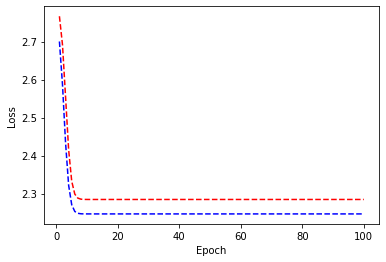

2.246527671813965


In [43]:
train_loss = history1.history['loss']
test_loss = history1.history['val_loss']
count = range(1, len(train_loss) + 1)
plt.plot(count, train_loss, 'r--');
plt.plot(count, test_loss, 'b--');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.show();
print(test_loss[-1]);

In [46]:
preds = history.predict(X_test)
preds

array([[1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],


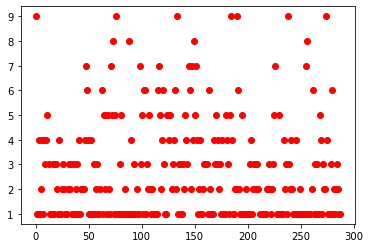

In [48]:
plt.plot((Y_test.to_numpy().reshape(-1, 1) - preds)[:], 'ro');

In [54]:
from keras import models  
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation 

history.summary()

Model: "sequential_428"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1284 (Dense)           (None, 12)                228       
_________________________________________________________________
dense_1285 (Dense)           (None, 12)                156       
_________________________________________________________________
dense_1286 (Dense)           (None, 1)                 13        
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [121]:
Input = Data.iloc[:,0:12]
OutputWeekend = Data.iloc[:, 13]
OutputWeekend

0      1
1      1
2      3
3      1
4      2
      ..
644    2
645    1
646    1
647    4
648    4
Name: Walc, Length: 1439, dtype: int64

In [67]:
encoder = LabelEncoder()
encoder.fit(OutputWeekend)
encoded_output = encoder.transform(OutputWeekend)
dummy_y_weekend = np_utils.to_categorical(encoded_output)
dummy_y_weekend

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [111]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(9, input_dim=12, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(5, activation='sigmoid'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [112]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose = 0)

In [113]:
kfold = KFold(n_splits=10, shuffle=True)

In [114]:
results = cross_val_score(estimator, Input, dummy_y_weekend, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 39.05% (5.15%)


In [115]:
def baseline_model2():
    # create model
    model = Sequential()
    model.add(Dense(9, input_dim=12, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [116]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose = 0)
kfold = KFold(n_splits=10, shuffle=True)

In [117]:
results = cross_val_score(estimator, Input, dummy_y_weekend, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 42.18% (3.40%)
